In [1]:
from keras.datasets import fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.


In [2]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape:', train_X.shape, train_Y.shape)
print('Testing data shape:', test_X.shape, test_Y.shape)


Training data shape: (60000, 28, 28) (60000,)
Testing data shape: (10000, 28, 28) (10000,)


In [3]:
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total no of outputs', nClasses)
print('Output classes', classes)

Total no of outputs 10
Output classes [0 1 2 3 4 5 6 7 8 9]


Text(0.5,1,'Ground Truth: 9')

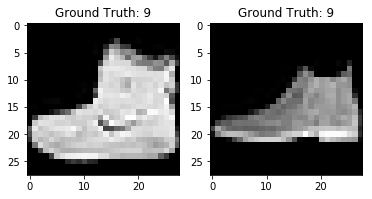

In [4]:
plt.figure(figsize=[6,6])
#dispalying the first train image
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth: {}".format(train_Y[0]))
#displaying the first test image
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth: {}".format(test_Y[0]))

Data Processing

In [5]:
train_X =train_X.reshape(-1,28,28,1)
test_X =test_X.reshape(-1,28,28,1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [6]:
train_X=train_X.astype('float32')
test_X=test_X.astype('float32')

train_X = train_X / 255
test_X= test_X / 255

In [7]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

print('Original Label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original Label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [8]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X,train_Y_one_hot, test_size=0.2, random_state=13)

# model the data

In [9]:
import keras
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

batch_size =64
epochs = 2
num_classes =10

In [10]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3), activation ='linear',data_format="channels_last",input_shape=(28,28,1), padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2,2), padding='same'))
fashion_model.add(Conv2D(64, (3,3), activation ='linear', padding ='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
fashion_model.add(Conv2D(128, (3,3), activation='linear', padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dense(num_classes,activation='softmax'))


In [11]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [12]:
fashion_model.get_weights()

[array([[[[-0.09945804,  0.0915065 ,  0.03485741,  0.08161819,
            0.08119676,  0.07725154, -0.07746923, -0.0223191 ,
           -0.05162062,  0.08703659,  0.04245423,  0.06205128,
           -0.08285289, -0.09201675, -0.03784846,  0.13279815,
            0.07207875,  0.04125308,  0.0090504 ,  0.0620718 ,
           -0.02916222,  0.01322412, -0.00527263, -0.08186387,
           -0.08391537, -0.10227016, -0.06112178, -0.08593874,
            0.05368049,  0.05811486,  0.01558812,  0.01546992]],
 
         [[-0.04137689,  0.0308729 , -0.08471477,  0.09032054,
           -0.10671425, -0.12254865,  0.08711937,  0.12238993,
            0.0037889 , -0.04131994,  0.04753834, -0.0656004 ,
            0.08671738,  0.06353861,  0.09234776, -0.05339721,
            0.00402781,  0.07460652, -0.06749061,  0.01039584,
           -0.06269942, -0.05914698, -0.04248975,  0.01445159,
           -0.0810686 , -0.02815664,  0.13802241, -0.13463986,
           -0.05177849,  0.05462985, -0.07831627, -

In [13]:
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
__________

In [14]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs =epochs, verbose=1, validation_data=(valid_X,valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/2
48000/48000 [==============================] - 206s 4ms/step - loss: 0.4703 - acc: 0.8297 - val_loss: 0.3449 - val_acc: 0.8766
Epoch 2/2
48000/48000 [==============================] - 204s 4ms/step - loss: 0.2963 - acc: 0.8909 - val_loss: 0.3134 - val_acc: 0.8858


In [15]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)

In [16]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.32280341728925704
Test accuracy: 0.8783


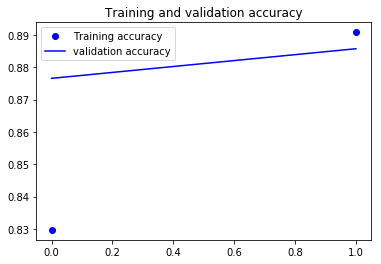

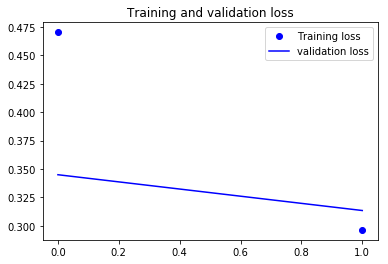

In [17]:
accuracy= fashion_train.history['acc']
val_accuracy = fashion_train.history['val_acc']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss,'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()